In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv(r"F:\applied machine learing\My data set\project 24\imbalanced\train\train.csv")


In [92]:
df_test=pd.read_csv(r"F:\applied machine learing\My data set\project 24\imbalanced\test\test.csv")

In [3]:
df_train.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


In [4]:
%%timeit
df_test.describe()

117 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
df_train.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [6]:
df_train.income_level.value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

finding missing values
---------------------------------
1.df_train.
hispanic_origin
state_of_previous_residence   
migration_msa                       99696
migration_reg                       99696
migration_within_reg  
migration_sunbelt       
country_father                       6713
country_mother                       6119
country_self 

---------------------------------
df_test set does not have any mssing values.


# filling missing values

In [7]:
df_miss=df_train[['state_of_previous_residence','hispanic_origin','migration_msa','migration_reg','migration_within_reg','migration_sunbelt'
                 ,'country_father','country_mother','country_self']]

In [8]:
df_miss.columns

Index(['state_of_previous_residence', 'hispanic_origin', 'migration_msa',
       'migration_reg', 'migration_within_reg', 'migration_sunbelt',
       'country_father', 'country_mother', 'country_self'],
      dtype='object')

In [9]:
df_miss.dtypes
#it is clear that all the miissing value columns are categorical/object.
# so we have to use mode for that.

state_of_previous_residence    object
hispanic_origin                object
migration_msa                  object
migration_reg                  object
migration_within_reg           object
migration_sunbelt              object
country_father                 object
country_mother                 object
country_self                   object
dtype: object

In [10]:
df_train.state_of_previous_residence.value_counts()
print(df_train.columns)

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')


In [11]:
import scipy.stats as ss
import numpy as np
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [12]:
for x in df_train.columns:
    v=cramers_v(df_train[x],df_train.state_of_previous_residence)
    if v>0.85:
        print(x, v)

region_of_previous_residence 0.9758500164416093
state_of_previous_residence 1.0
migration_sunbelt 0.9703837823935438


we ARE GOING TO USE region_of_previous_residence to fill missing values of state_of_previous_residence

In [13]:
#df_train.state_of_previous_residence.fillna(df_train.groupby("region_of_previous_residence")['state_of_previous_residence'].agg(lambda x:x.value_counts().index[0])))

In [14]:
sopr=df_train.pivot_table(values="state_of_previous_residence",columns="region_of_previous_residence",aggfunc=(lambda x:x.value_counts().index[0]))

In [15]:
miss_bool=df_train.state_of_previous_residence.isnull()

In [16]:
#df_train.ix[miss_bool,'state_of_previous_residence'] = df_train.ix[miss_bool,'state_of_previous_residence'].apply(lambda x: sopr[x])

In [17]:
sopr

region_of_previous_residence,Abroad,Midwest,Northeast,Not in universe,South,West
state_of_previous_residence,Abroad,Oklahoma,North Carolina,Not in universe,Utah,California


In [18]:
df_train[df_train.region_of_previous_residence=="Northeast"].state_of_previous_residence.fillna("North Carolina",inplace=True)

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
df_train[df_train.state_of_previous_residence.isna()==True].region_of_previous_residence.value_counts()

Northeast    440
South        268
Name: region_of_previous_residence, dtype: int64

In [20]:
df_train[df_train.region_of_previous_residence=="Northeast"].state_of_previous_residence.fillna("North Carolina",inplace=True)

In [21]:
df_train[df_train.region_of_previous_residence=="South"].state_of_previous_residence.replace({0:"Utah"},inplace=True)

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
df_train.state_of_previous_residence.fillna(0,inplace=True)


In [23]:
df_train[df_train.region_of_previous_residence=="Northeast"].state_of_previous_residence.replace({0:"North Carolina"},inplace=True)

In [24]:
df_train.state_of_previous_residence.isna().sum()

0

In [25]:
df_miss.columns

Index(['state_of_previous_residence', 'hispanic_origin', 'migration_msa',
       'migration_reg', 'migration_within_reg', 'migration_sunbelt',
       'country_father', 'country_mother', 'country_self'],
      dtype='object')

#filling hispanic_origin

In [26]:
df_train.hispanic_origin.isna().sum()

874

In [27]:
df_train.hispanic_origin.value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [28]:
for x in df_train.columns:
    v=cramers_v(df_train[x],df_train.hispanic_origin)
    if v>0.3:
        print(v, x)

0.9999999999999999 hispanic_origin
0.5835849486525734 country_father
0.5915524135092792 country_mother
0.5276762211002716 country_self
0.40516509582211124 citizenship


using country_mother to fill the missing values

In [29]:
hispo=df_train.pivot_table(values="hispanic_origin",columns="country_mother",aggfunc=(lambda x:x.value_counts().index[0]))

In [30]:
#df_train.hispanic_origin.fillna(0,inplace=True)

In [31]:
df_train.set_index("citizenship",inplace=True)

In [32]:
df_train.hispanic_origin.fillna(df_train.groupby("citizenship")['hispanic_origin'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [33]:
df_train.hispanic_origin.isnull().sum()

0

In [34]:
print(df_train.migration_msa.isnull().sum(),df_train.shape)

99696 (199523, 40)


In [35]:
99696/199523#more than 40% of data is missing it is better to drop that column

0.4996717170451527

In [46]:
#droping migration_msa in both train and test
df_train.drop(["migration_reg"],1,inplace=True)

In [37]:
df_train.reset_index(inplace=True)

In [38]:
df_train.citizenship.value_counts()

Native- Born in the United States              176992
Foreign born- Not a citizen of U S              13401
Foreign born- U S citizen by naturalization      5855
Native- Born abroad of American Parent(s)        1756
Native- Born in Puerto Rico or U S Outlying      1519
Name: citizenship, dtype: int64

In [93]:
df_test.drop(['migration_within_reg'],1,inplace=True)
df_test.drop(['migration_sunbelt'],1,inplace=True)
df_test.drop(["migration_reg"],1,inplace=True)
df_test.drop(["migration_msa"],1,inplace=True)

In [51]:
for x in df_train.columns:
    v=cramers_v(df_train[x],df_train.country_father)
    if v>0.3:
        print(x, v)

citizenship 0.5140007596102676
race 0.4580595008254694
hispanic_origin 0.5829837412464063
country_father 1.0
country_mother 0.7883892012402226
country_self 0.6714306823824981


In [53]:
df_train.set_index("citizenship",inplace=True)

In [55]:
df_train.country_father.fillna(df_train.groupby("citizenship")["country_father"].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [59]:
df_train.country_mother.fillna(df_train.groupby("citizenship")["country_mother"].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [60]:
df_train.country_self.fillna(df_train.groupby("citizenship")["country_self"].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [61]:
df_train.isna().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_Worked_employer          0
family_membe

In [64]:
corr=df_train.corr()

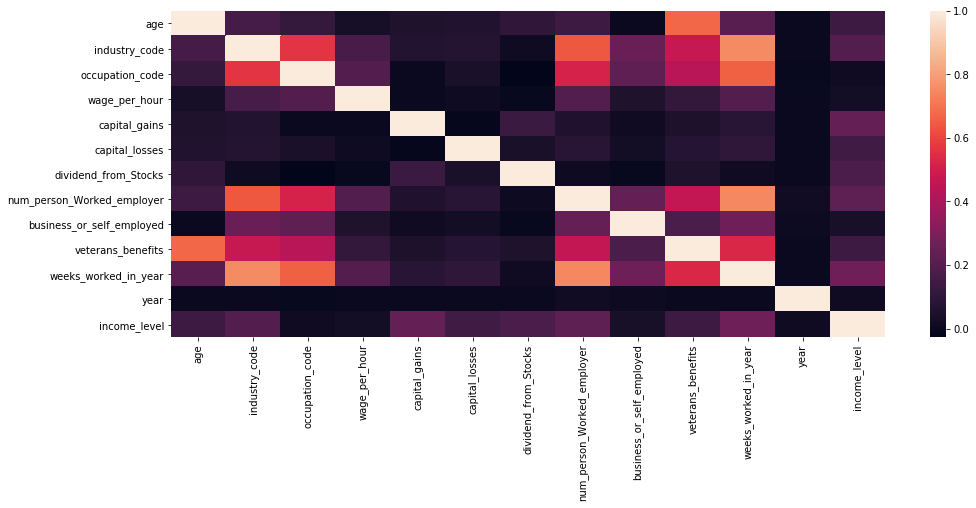

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(16,6))
sns.heatmap(corr)

In [81]:
df_train.income_level.replace({-50000:0,50000:1},inplace=True)

In [83]:
df_train.income_level.value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [95]:
df_test.income_level.value_counts()

-50000    93576
 50000     6186
Name: income_level, dtype: int64

In [96]:
df_test.income_level.replace({-50000:0,50000:1},inplace=True)

In [97]:
df_test.income_level.value_counts()

0    93576
1     6186
Name: income_level, dtype: int64

# EDA

In [98]:
df_train.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'live_1_year_ago', 'num_person_Worked_employer',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'business_or_self_employed',
       'fill_questionnaire_veteran_admin', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [99]:
df_train.dtypes

age                                  int64
class_of_worker                     object
industry_code                        int64
occupation_code                      int64
education                           object
wage_per_hour                        int64
enrolled_in_edu_inst_lastwk         object
marital_status                      object
major_industry_code                 object
major_occupation_code               object
race                                object
hispanic_origin                     object
sex                                 object
member_of_labor_union               object
reason_for_unemployment             object
full_parttime_employment_stat       object
capital_gains                        int64
capital_losses                       int64
dividend_from_Stocks                 int64
tax_filer_status                    object
region_of_previous_residence        object
state_of_previous_residence         object
d_household_family_stat             object
d_household

In [117]:
for x in df_train.columns:
    v=cramers_v(df_train[x],df_train.income_level)
    if df_train[x].dtype=="O" and v>0.2:
        print(x)

class_of_worker
education
major_industry_code
major_occupation_code
tax_filer_status
d_household_family_stat
d_household_summary


In [119]:
df_obj=["class_of_worker",'education','major_industry_code','major_occupation_code','tax_filer_status','d_household_family_stat','d_household_summary','income_level']


In [120]:
train=df_train[df_obj]
test=df_test[df_obj]

In [122]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [127]:
from sklearn import preprocessing

In [128]:
le = preprocessing.LabelEncoder()

In [129]:
le.fit(train.class_of_worker)

LabelEncoder()

In [135]:
train.class_of_worker=le.transform(train.class_of_worker)

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [137]:
for x in train.drop(['income_level'],1):
    train[x]=le.fit_transform(train[x])

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
df_obj1=["class_of_worker",'education','major_industry_code','major_occupation_code','tax_filer_status','d_household_family_stat','d_household_summary','income_level','citizenship']

In [141]:
test=df_test[df_obj1]

In [144]:
clf_rf=RandomForestClassifier()
clf_rf.fit(train.drop(['income_level'],1),train['income_level'])

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [145]:
clf_rf.score(test.drop(['income_level'],1),test['income_level'])

0.9377819209719132

In [148]:
from sklearn.metrics import roc_auc_score

In [149]:
k=clf_rf.predict(test.drop(['income_level'],1))

In [150]:
roc_auc_score(test['income_level'],k)

0.5014729646662616

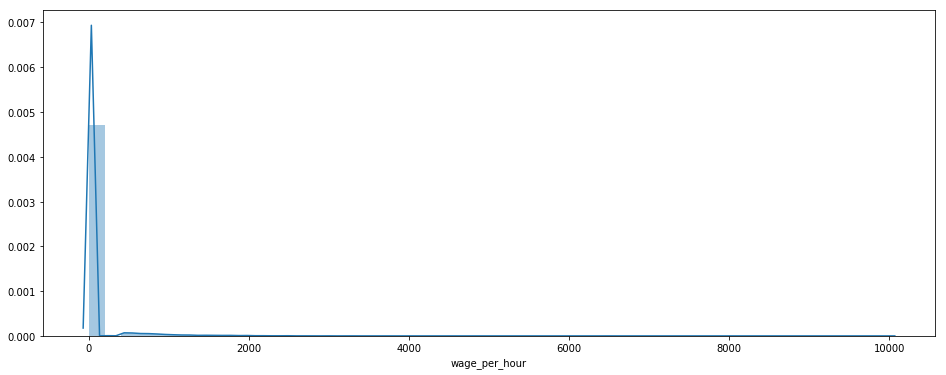

In [155]:
plt.figure(figsize=(16,6))
sns.distplot(df_train.wage_per_hour)

In [162]:
for x in df_train.drop(['income_level'],1).columns:
    if df_train[x].dtype=="int64":
        #if ss.pointbiserialr(df_train.income_level, df_train[x])[0]>0.2:
        print(x,ss.pointbiserialr(df_train.income_level, df_train[x])[0])

age 0.13572037728130587
industry_code 0.19618969446023996
occupation_code 0.013414010148058033
wage_per_hour 0.024528208908774145
capital_gains 0.24072481971565338
capital_losses 0.14741707555079017
dividend_from_Stocks 0.17211602965334505
num_person_Worked_employer 0.22268402820146857
business_or_self_employed 0.040472535247869326
veterans_benefits 0.14092979005866343
weeks_worked_in_year 0.26231613613283955
year 0.014793783478957547


In [165]:
dtr=df_train[["class_of_worker",'education','major_industry_code','major_occupation_code','tax_filer_status','d_household_family_stat','d_household_summary','income_level',
             'age','wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks','num_person_Worked_employer','veterans_benefits','weeks_worked_in_year']]

In [166]:
dte=df_test[["class_of_worker",'education','major_industry_code','major_occupation_code','tax_filer_status','d_household_family_stat','d_household_summary','income_level',
             'age','wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks','num_person_Worked_employer','veterans_benefits','weeks_worked_in_year']]

In [168]:
len(dtr.columns)

16

In [171]:
len(dte.columns)

16

In [173]:
for x in dtr.drop(['income_level'],1):
    if dtr[x].dtype=="O":
        dtr[x]=le.fit_transform(dtr[x])

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
dtr.reset_index(inplace=True)

In [177]:
dtr['citizenship']=le.fit_transform(dtr['citizenship'])

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
dte.reset_index(inplace=True)

In [180]:
for x in dte.drop(['income_level'],1):
    if dte[x].dtype=="O":
        dte[x]=le.fit_transform(dte[x])

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [181]:
clf_rf=RandomForestClassifier()
clf_rf.fit(dtr.drop(['income_level'],1),dtr['income_level'])

c:\users\shiva kumar\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
k=clf_rf.predict(dte.drop(['income_level'],1))
roc_auc_score(test['income_level'],k)

0.6613219703179382

# smote implementation

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
se=SMOTE()

In [186]:
 X_res, y_res = se.fit_resample(dtr.drop(['income_level'],1),dtr['income_level'])

In [187]:
clf_rf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
#after implementation of smote
k=clf_rf.predict(dte.drop(['income_level'],1))
roc_auc_score(test['income_level'],k)

0.776138688640517